# 인천공항 이용자수 분석 및 예측

- https://kosis.kr/search/search.do

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

file_path = "./ref/출입국항구내외국인성별국제이동연간20250305.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")  # 우분투는 인코딩 생략가능
ori.tail() 

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [2]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
#ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [3]:
filter1 = ex1_data['type1'] == '외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [5]:
filter2 = ex2_data['type2'] == '입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2'] == '출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name='total')
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name='total')

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')

Text(0.3, 0.3, '한글')

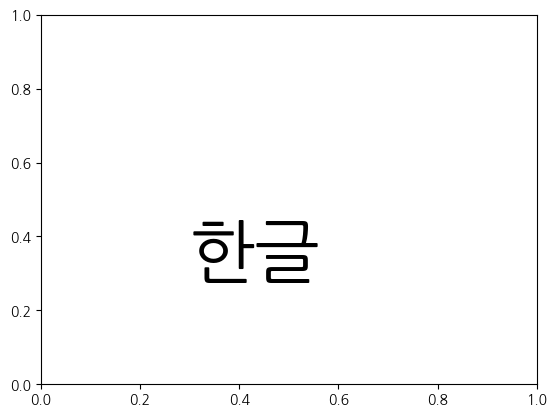

In [7]:
path =  'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글',size=50)

<Axes: title={'center': '2001~2023년 인천공항 입국차트'}>

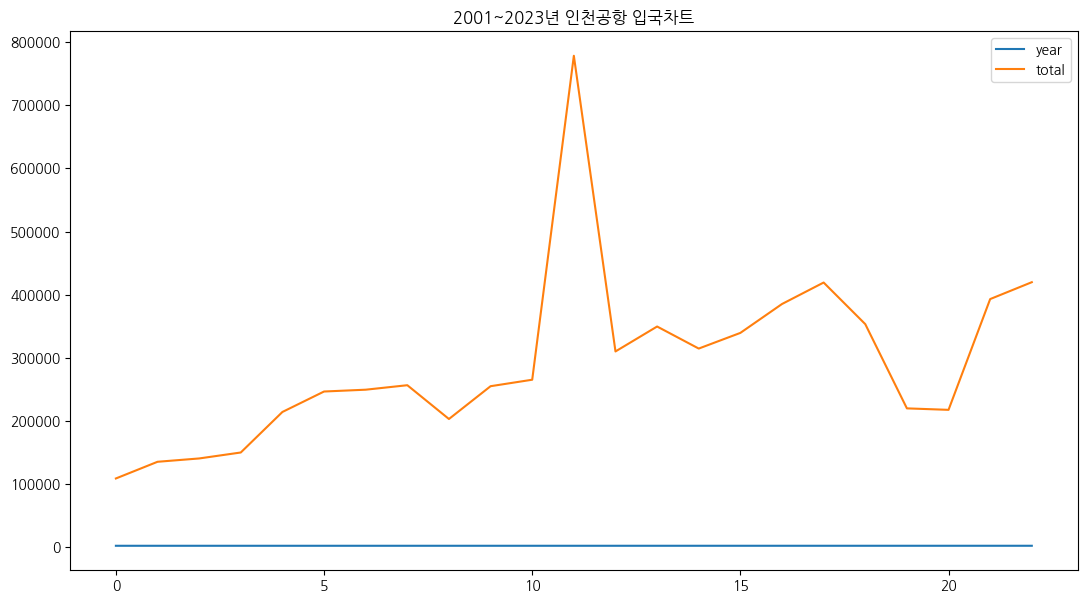

In [8]:
ex2_data.plot(figsize=(13,7),title="2001~2023년 인천공항 입국차트")

In [9]:
!pip install prophet

In [10]:
!pip install --upgrade plotly

In [11]:
!pip install tqdm

In [12]:
!pip install --upgrade jupyter ipywidgets

In [13]:
from prophet import Prophet 

In [14]:
ex4_data = ex1_data.copy()
ex1_data['year'] = pd.to_datetime(ex1_data['year'],format="%Y")
ex4_data = ex1_data.rename(columns={'year':'ds','total':'y'})
ex4_data.head()

,ds,y
0,2001-01-01,521210
1,2002-01-01,697631
2,2003-01-01,747272
3,2004-01-01,769912
4,2005-01-01,991717


In [15]:
m=Prophet()
m.fit(ex4_data)

14:48:56 - cmdstanpy - INFO - Chain [1] start processing
14:48:56 - cmdstanpy - INFO - Chain [1] done processing


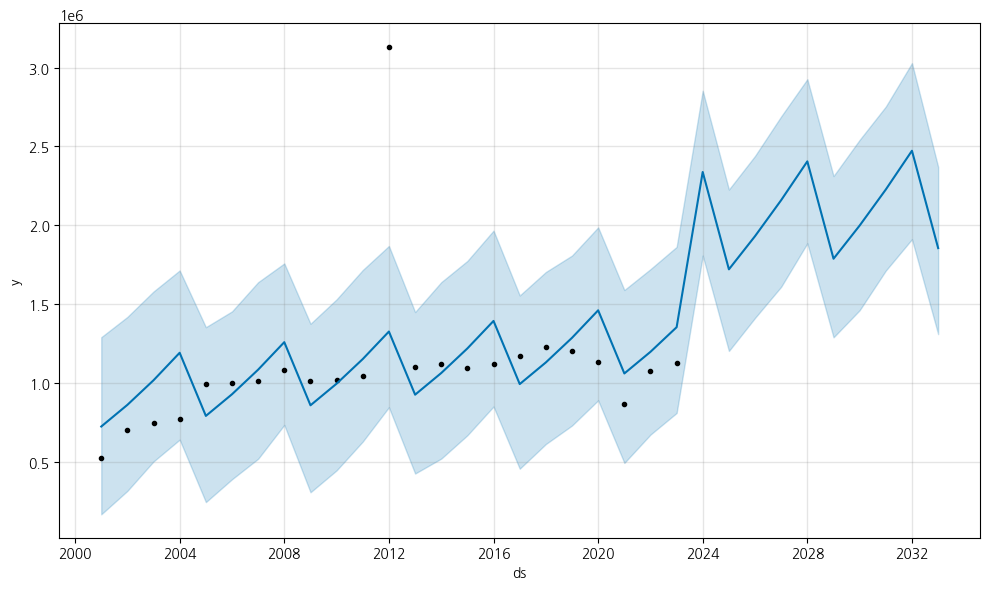

<Figure size 1000x1500 with 0 Axes>

In [16]:
future = m.make_future_dataframe(periods=10,freq='YE')
forecast=m.predict(future)
fig1=m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

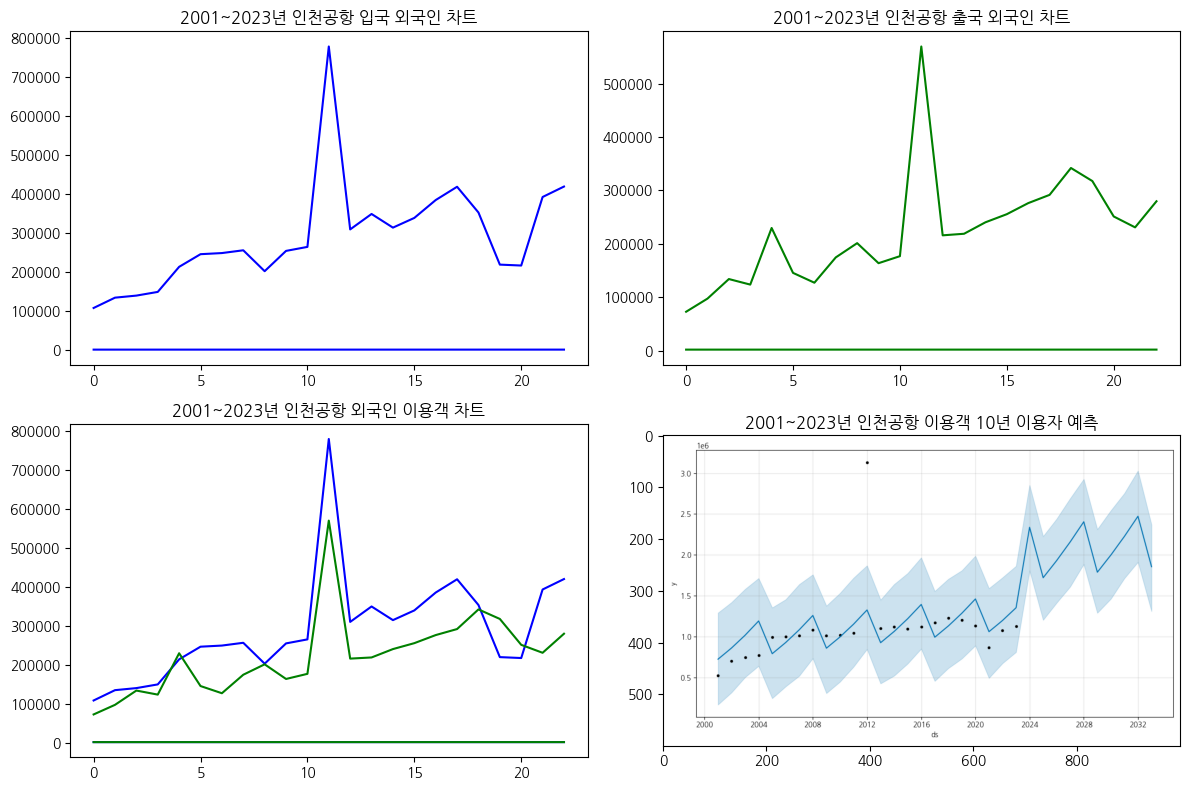

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("./chart/예측.png")

fig , axs = plt.subplots(2,2,figsize=(12,8))

axs[0,0].plot(ex2_data, color="b")
axs[0,1].plot(ex3_data, color="g")
axs[1,0].plot(ex2_data, color="b")
axs[1,0].plot(ex3_data, color="g")
axs[0,0].set_title("2001~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2001~2023년 인천공항 출국 외국인 차트")
axs[1,0].set_title("2001~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2001~2023년 인천공항 이용객 10년 이용자 예측")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()